In [4]:
import os
import sys
sys.path.append("c:/pd_lapl")

In [5]:
from lapl_well import LaplWell
from well import Well
import pandas as pd
from sources import Sources
from matrixizer import *
import matplotlib.pyplot as plt
% matplotlib inline
from scipy.special import iti0k0



ImportError: attempted relative import with no known parent package

In [8]:
outer_bound = "inf"
top_bound = "imp"
bottom_bound = "imp"
wtype = "frac"
nseg_ = 10
nwells_ = 1
xwds_ = [0]
ywds_ = [0]
x_lengths = 1
xed = None
yed = None
zwds = None
hd = None

In [9]:
lapl_well = LaplWell(outer_bound, top_bound, bottom_bound,
                    wtype, nseg, nwells, xwds, ywds, attrs = {"Fcd": 10})
well = Well(outer_bound, top_bound, bottom_bound,
                    wtype, nseg, nwells_, xwds_, ywds_, attrs = {"Fcd": 10})

In [4]:
lapl_well.matrixizer.make_calc_matr(lapl_well.sources_, "-", 0)

In [5]:
inds_dyds_0, unique_lims_dyd_0, inverse_inds_dyd_0, len_alims1, mask1, mask2 = lapl_well.matrixizer.m_cache["dyds_0"]["0-"]

In [6]:
s = 77
su = s**0.5
m = np.zeros((2*nseg, 2*nseg))

In [7]:
uvals = 0.5/su*iti0k0(su*unique_lims_dyd_0)[1]
lapl_well.matrixizer.reconstruct_dyds_0(m, inds_dyds_0, uvals, inverse_inds_dyd_0, len_alims1, mask1, mask2)

In [8]:
lapl_well.recalc(s)

In [9]:
lapl_well.pw_lapl

0.0034870062157836383

## LaplWell for infinite tested

In [10]:
# reference data from the paper []
ref_df = pd.read_csv('../calibration_points.csv', sep=";", decimal=',')
y_trues = ref_df.iloc[:,1:]
ts = np.array(ref_df["Td_xf"])

In [11]:
# make predictions for reference Fcd's
predictions = None
for i in range(1, ref_df.shape[1]):
    y_true = ref_df.iloc[:,[i]]
    Fcd = float(y_true.columns[0].replace(',', '.'))
    well = Well(outer_bound, top_bound, bottom_bound,
                    wtype, nseg, nwells, xwds, ywds, attrs = {"Fcd": Fcd})
    y = np.array([])
    for td in ts:
        y = np.append(y, well.pw(td))
    if predictions is None:
        predictions = y[np.newaxis]
    else:
        predictions = np.vstack([predictions, y])
    print("Fcd {} finished".format(Fcd))

Fcd 0.628318531 finished
Fcd 3.141592654 finished
Fcd 6.283185307 finished
Fcd 31.41592654 finished
Fcd 62.83185307 finished
Fcd 314.1592654 finished


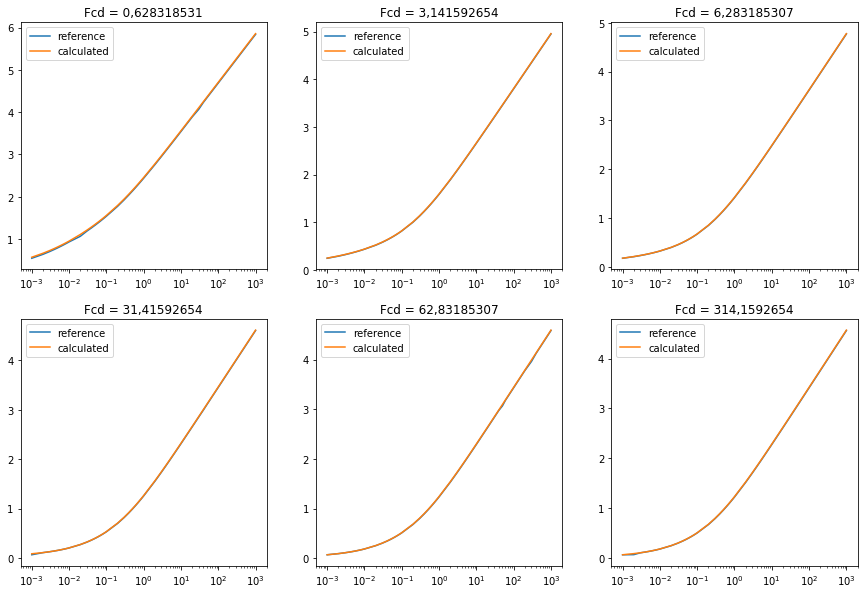

In [12]:
fig = plt.figure(figsize=(15,10))
n_plots = predictions.shape[0]
for i in range(n_plots):
    fig.add_subplot(2, n_plots//2, i+1)
    plt.xscale("log")
    y_true = y_trues.iloc[:,[i]]
    plt.title("Fcd = {}".format(y_true.columns[0]))
    plt.plot(ts, y_true, label="reference")
    plt.plot(ts, predictions[i,:], label="calculated")
    plt.legend()

## Well for reference data tested

In [4]:
outer_bound = "inf"
top_bound = "imp"
bottom_bound = "imp"
wtype = "frac"
nseg = 10
nwells = 3
xwds = [0, 0, 0]
ywds = [-1, 0, 1]
x_lengths = 1
xed = None
yed = None
zwds = None
hd = None
mf_well = Well(outer_bound, top_bound, bottom_bound,
                    wtype, nseg, nwells, xwds, ywds, attrs = {"Fcd": 10})
mf_lapl = mf_well.lapl_well

In [6]:
s = 1
mf_lapl.recalc(s)
green = mf_lapl.green_matrix

In [7]:
green

array([[ 0.        ,  0.2056295 ,  0.12363514, ...,  0.00269032,
         0.00249012,  0.00229988],
       [ 0.        ,  0.12363514,  0.2056295 , ...,  0.00289983,
         0.00269032,  0.00249012],
       [ 0.        ,  0.08817931,  0.12363514, ...,  0.00311767,
         0.00289983,  0.00269032],
       ..., 
       [ 0.        ,  0.00249012,  0.00269032, ...,  0.12363514,
         0.2056295 ,  0.12363514],
       [ 0.        ,  0.00229988,  0.00249012, ...,  0.08817931,
         0.12363514,  0.2056295 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])